In [1]:
# Tarea 4 ; Transformaciones del pipeline de ingenieria de caracteristicas:

In [2]:
# Importar la data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('train_HP.csv')

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# para saber cuantas filas y cuantas columanas tenemos
dataset.shape

(1460, 81)

In [6]:
### Vericamos si una columna tiene NA's o no
dataset ['MSSubClass']. isnull().sum()

0

In [7]:
dataset ['LotFrontage']. isnull().sum()

259

In [8]:
dataset ['SalePrice']. isnull().sum()

0

In [9]:
# conocer los nombres de las variables 
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# Identificando es tipo de varible
colnames = dataset.columns
for col in colnames:
    print(type(col))



<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [11]:
# Devuelve las columanas que tienen NA's
colnames = dataset.columns
for col in colnames:
    if(dataset[col].isnull().sum () > 0):
     print(col)


LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [12]:
# Meter las columnas que tienen N'as  en una lista
colnames = dataset.columns
cols_con_na = []
for col in colnames:
    if(dataset[col].isnull().sum () > 0):
     cols_con_na.append(col)
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [13]:
# Definir una función , para pasar el dataframe# sirve el resto de la carrera. 
# Sirve para cualquier dataframe que deseamos analizar, asignamos una función 

def getNanColNames (df):
    colnames = df.columns
    cols_con_na = []
    for col in colnames:
        if(df[col].isnull().sum () > 0):
            cols_con_na.append(col)
    return cols_con_na

In [14]:
# Declarar una varibale, 
Cols_Con_nan = getNanColNames(dataset)
Cols_Con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
# Verificamos el tipo de devariable 
dataset[Cols_Con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [16]:
# Verificamos la proporción de Na´s
# Genera la cantidad de faltantes que tiene la columna
dataset[Cols_Con_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [17]:
# Son  las procesables faciles, y generamos una lista vacía. 
def getNangoodColsNames(df, rate = 0.2):
    cols_procesables = []
    for col in df.columns:
        if ((df[col].isnull().mean() < rate)):
            cols_procesables.append(col)
    return cols_procesables



In [18]:
Cols_procesables = getNangoodColsNames(dataset)
Cols_procesables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [19]:
Cols_procesables = getNangoodColsNames(dataset, 0.05)
Cols_procesables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [20]:
# ser mas restrictivo con el Rate: , para omitir  una variable para tratarla, las que tienen menos
# del 5%

Cols_cca = getNangoodColsNames(dataset, 0.05)
Cols_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [21]:
# aplicamos el Criterio de CCA
# Aplicamos criterios de CCA ( para casos de analísis completos )
dataset_temp = dataset[Cols_cca].dropna()


In [22]:
dataset_temp.shape, dataset.shape

((1412, 70), (1460, 81))

In [23]:
dataset_temp['GrLivArea'].isnull().sum()

0

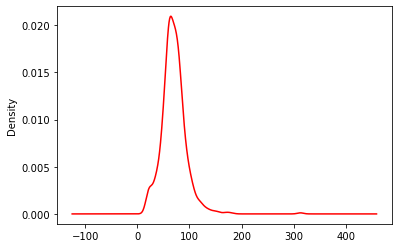

In [24]:
### Análisis  más profundo 
dataset['LotFrontage'].plot.density(color = "red")
plt.show()


In [25]:
# sacar y conocer la media 
meanValue = dataset['LotFrontage'].mean ()
meanValue

70.04995836802665

In [26]:
# sacamos la mediana 
medianValue = dataset['LotFrontage'].median ()
medianValue

69.0

In [27]:
# eliminar  los decimales, para imputar números enteros
#IMPUTACIÓN DE LA MEDIA Y LA MEDIANA
meanValue = np.round(dataset['LotFrontage'].mean (), 0)
medianValue = np.round(dataset['LotFrontage'].median (), 0)

In [28]:
meanValue

70.0

In [29]:
medianValue

69.0

In [30]:
# procedemos a imputar los datos con número enteros
dataset_FL_meanImp = dataset['LotFrontage'].fillna(meanValue)
dataset_FL_medianImp = dataset['LotFrontage'].fillna(medianValue)

In [31]:
dataset_FL_meanImp

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [32]:
medianValue

69.0

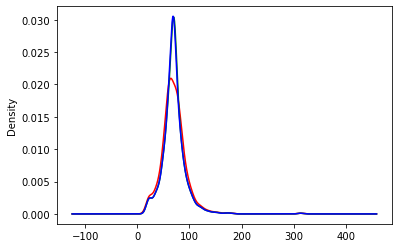

In [33]:
# vamos a crear una gráfica para ver la variación 
# (111, significado es que gráficamos una fila, una columna , una figura)
fig = plt.figure()
fig.add_subplot(111)
dataset['LotFrontage'].plot.density(color = "red")
dataset_FL_meanImp.plot.density(color = "green")
dataset_FL_medianImp.plot.density(color = "blue")
plt.show()

In [34]:
# Para definir un mejor criterio entre la media o mediana, para tratar los datros.  un criterio base
# considerado la capacidad predictiba en lugar de un criterio de distorsión. 


In [35]:
np.corrcoef(dataset_FL_meanImp, dataset['SalePrice'])

array([[1.        , 0.33489718],
       [0.33489718, 1.        ]])

In [36]:
np.corrcoef(dataset_FL_medianImp, dataset['SalePrice'])

array([[1.        , 0.33477085],
       [0.33477085, 1.        ]])

In [37]:
# comentario:  se deshabilito para no caerle encima porque se requiere imputación con los N'as
#dataset['LotFrontage'] = dataset['LotFrontage'].fillna(meanValue)



In [38]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
#Si en dado caso no se llegara ejecutar correctamente la varianza es necesario  llamar dataset, en está posición
# si la varianza genera el mismo dato.
 # dataset = pd.read_csv('train_HP.csv')

In [40]:

dataset['LotFrontage'].isnull().sum()

259

In [41]:
# Proceder con la Imputación Arbritaria
dataset_IA = dataset

In [42]:
#Obtener un resumen estadistico 
dataset_IA['LotFrontage'].describe ()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [43]:
# una imputación arbritaria atipica, es un numero sea un poco más grande y la tipica es -1
dataset_IA['LotFrontage_320']= dataset_IA['LotFrontage'].fillna(320)
dataset_IA['LotFrontage_-1']= dataset_IA['LotFrontage'].fillna(-1)

In [44]:
# proceder con el Análisis de la varianza
print("Varianza original:", dataset_IA['LotFrontage'].var())
print("Varianza 320:", dataset_IA['LotFrontage_320'].var())
print("Varianza -1:", dataset_IA['LotFrontage_-1'].var())



Varianza original: 589.7491687482642
Varianza 320: 9608.128489207307
Varianza -1: 1222.218454655557


In [45]:
dataset_IA

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_320,LotFrontage_-1
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,65.0,65.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,80.0,80.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,68.0,68.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,60.0,60.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,84.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,62.0,62.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,85.0,85.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,66.0,66.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,68.0,68.0


<AxesSubplot:ylabel='Density'>

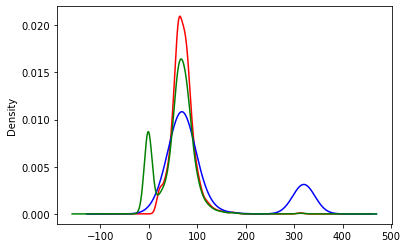

In [46]:
# gráficar para ver que tanto se deforma la distribución 
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_IA['LotFrontage'].plot.density(color = "red", label ="original")
dataset_IA['LotFrontage_320'].plot.density(color = "blue", label ="320")
dataset_IA['LotFrontage_-1'].plot.density(color = "green", label ="-1")



In [47]:
# cuando la variable no es un número ,  pero es una categoria. 
# Trabajamos la imputación de Categorías Faltantes
# verificamos , las  que son object, son categoricas, tipo string. 
dataset[Cols_Con_nan].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [48]:
dataset_cat_missing= dataset[['BsmtQual', 'FireplaceQu', 'SalePrice']]

In [49]:
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [50]:
dataset_cat_missing.isnull().sum()

BsmtQual        37
FireplaceQu    690
SalePrice        0
dtype: int64

In [51]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [52]:
# los criterios que se debe de utilizar  para verificar que información nos provee la columan 
dataset_cat_missing['BsmtQual'].value_counts ()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [53]:
# si se toma una casa aleatoria , para apelar una imputación. 
dataset_cat_missing['BsmtQual'].value_counts () /len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

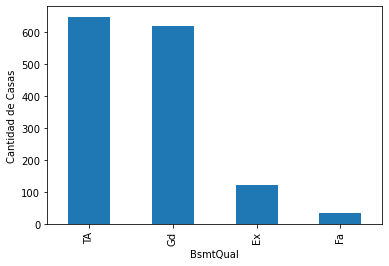

In [54]:
# Gráficar la columna
dataset_cat_missing['BsmtQual'].value_counts ().sort_values (ascending= False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("BsmtQual")
plt.show()


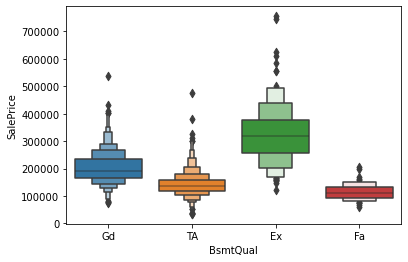

In [55]:
# Verificar cual de los elementos es má probable de faltantes
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['BsmtQual']
sns.boxenplot(x= bsq, y=sales)
plt.show()

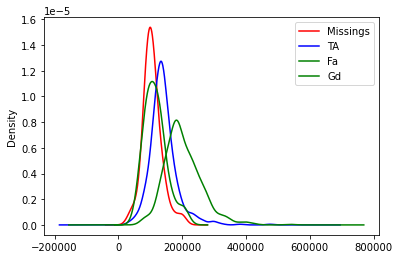

In [56]:
# Si se agarran los nulos  y seleccionamos exclusivamente los faltantes.
# gráficar para ver que tanto se deforma la distribución 
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtQual']== 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

In [57]:
# Para la imputación de una categoría
dataset_cat_missing['BsmtQual'].fillna('TA', inplace= True)


c:\Users\dicla.vasquez\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
# Analizar otra variable, se debe de hacer con todas las variables
#usando la variable FireplaceQual
dataset_cat_missing['FireplaceQu'].value_counts()/ len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

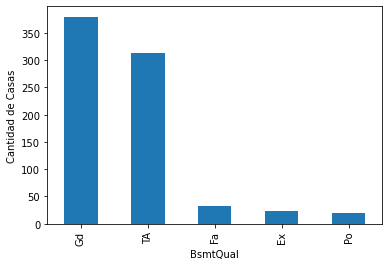

In [59]:
dataset_cat_missing['FireplaceQu'].value_counts ().sort_values (ascending= False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("BsmtQual")
plt.show()


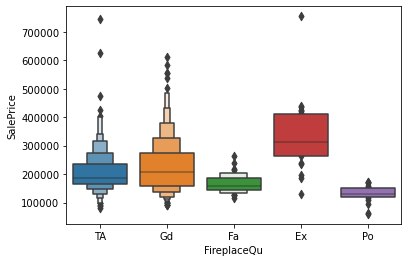

In [60]:
# Verificar cual de los elementos es má probable de faltantes
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxenplot(x= bsq, y=sales)
plt.show()

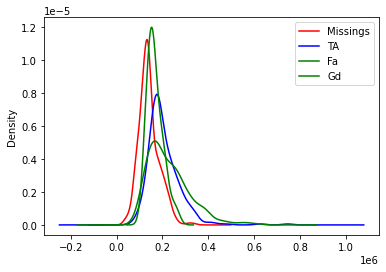

In [61]:
# Si se agarran los nulos  y seleccionamos exclusivamente los faltantes.
# gráficar para ver que tanto se deforma la distribución 
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

In [62]:
#no el más probable es el que se deberia de asignar,  en este ejercicio, se puede imputar PO y TA
# caual deberiamos de elegir, la variable que genere - distorsión
# cuando un algoritmo quiere hacer una predicción, va a sesgar los resultados, sobre la naturaleza de lo que significa faltante
#No sobre la naturaleza de la mayoria del TA




In [63]:
#usando la variable FireplaceQual
dataset_cat_missing['FireplaceQu'].fillna('Missing', inplace=True)

c:\Users\dicla.vasquez\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


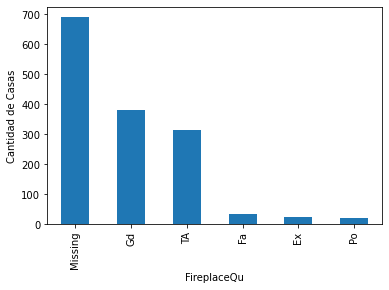

In [64]:
dataset_cat_missing['FireplaceQu'].value_counts ().sort_values (ascending= False).plot.bar()
plt.ylabel("Cantidad de Casas")
plt.xlabel("FireplaceQu")
plt.show()

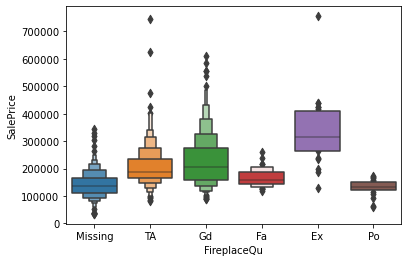

In [65]:
import seaborn as sns
sales = dataset_cat_missing['SalePrice']
bsq = dataset_cat_missing['FireplaceQu']
sns.boxenplot(x= bsq, y=sales)
plt.show()

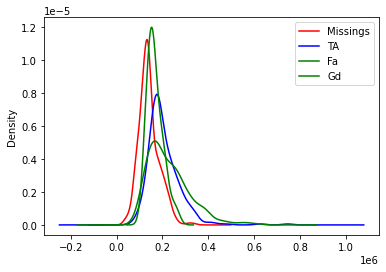

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Missing']['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu']== 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

In [67]:
# Codificación de Variables Categóricas

In [68]:
def getCategoryVars(df):
    colnames = df.columns
    Cat_cols = []
    for col in colnames:
        if (df[col].dtype == 'object'):
            Cat_cols.append(col)
    return Cat_cols

In [69]:
getCategoryVars(dataset)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [70]:
Cat_cols = getCategoryVars (dataset)

In [71]:
Cat_cols.append('SalePrice')

In [72]:
dataset_categorics = dataset[Cat_cols]

In [73]:
dataset_categorics

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [74]:
dataset_categorics.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [75]:
dataset_cat = dataset[['MSZoning', 'SalePrice']]

In [76]:
dataset_cat.head()

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000


In [77]:
#identificar, cuantas categorías tenemos de la variable MSZoning:
dataset_cat ['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [78]:
#ONE HOT Encondig
# Crear una columan, por cada una de las categorías que tenemos disponibles. 
pd.get_dummies (dataset_cat['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [79]:
#si hay mas de 10 categorías, ya no es recomendable, solo se debe de implementar cuando seda de 1 3 categorías máximos, en 
# el Proceso de One hot Encodig. es un enfoque tradicional
# pd.get_dummies (dataset_categorics)

In [80]:
# Frequency Encodign: lo que hace es  que agarra la columna y cuenta la cantidad de columnas que contiene.
dataset_categorics['Alley'].value_counts().sort_values(ascending= False)

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [81]:
# Se recomienda tener la más pequeña dimencionalidad: Frequency Encoding: cuenta la cantidad de ocurrencias que tiene la columna
# ventajas tiene: no genera una columna, solo una representación númerica.


In [82]:
dataset_categorics['SaleCondition'].value_counts().sort_values(ascending= False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [83]:
#Variable de lata frequencia
dataset_categorics['LandContour'].value_counts().sort_values(ascending= False)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [84]:
dataset_categorics['KitchenQual'].value_counts().sort_values(ascending= False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

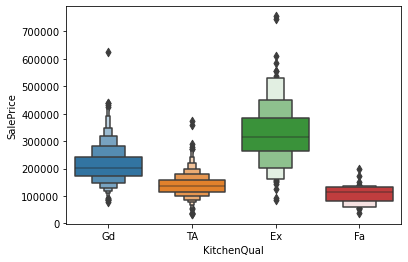

In [85]:
#Analizar el impacto que tiene las variables

sales = dataset_categorics['SalePrice']
bsq = dataset_categorics['KitchenQual']
sns.boxenplot(x= bsq, y=sales)
plt.show()

In [86]:
freq_mapper = dataset_categorics['KitchenQual'].value_counts().sort_values(ascending= False).to_dict()
freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [96]:
# Le vamos a caer encima de la columna:
dataset_categorics['KitchenQual']= dataset_categorics['KitchenQual'].map(freq_mapper)

C:\Users\DICLA~1.VAS\AppData\Local\Temp/ipykernel_11776/662854480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categorics['KitchenQual']= dataset_categorics['KitchenQual'].map(freq_mapper)


In [97]:
density_mapper = (dataset_categorics['KitchenQual'].value_counts().sort_values(ascending= False)/ len (dataset_categorics['KitchenQual'])).to_dict ()
density_mapper

{}

In [98]:
dataset = pd.read_csv('train_HP.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [99]:
def executefreqEncoding(df, map_type= 'freq'):
    colnames = df.columns

for col in colnames:
    if(df[col].dtype == 'object'):
        factor_div = 1 if (map_type =='freq') else len(df[col])
        mapper = (df[col].value_counts().sort_values (ascending= False)/ factor_div). to_dict()
        df[col]= df[col].map(freq_mapper)



NameError: name 'df' is not defined

In [ ]:
#parte del código de arrbia
#dataset_temp = dataset
#df = dataset_temp
#map_type = 'freq'


In [100]:
dataset_temp = dataset

In [101]:
executefreqEncoding(dataset_temp)


In [102]:
dataset_temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [103]:
# Transformación de Variables Númericas:
import scipy.stats as stats

In [104]:
len(dataset['LotArea'].unique())

1073

In [106]:
# Como sacamos las columnas númericas
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_Vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object')and (unique_values> 30 )):
            numeric_continues_Vars.append(col)
    return numeric_continues_Vars


In [105]:
getContinuesCols(dataset.drop())

NameError: name 'getContinuesCols' is not defined

In [107]:
numeric_cont_vars = getContinuesCols(dataset)

In [108]:
def plot_density_variable (df, variable):
    plt.figure(figsize= (15,6))
    plt.subplot(121)
    df[variable].hist (bins =30)
    plt.title(variable)


    plt.subplot(122)
    stats.probplot(df[variable], dist= "norm", plot= plt)
    plt.show()


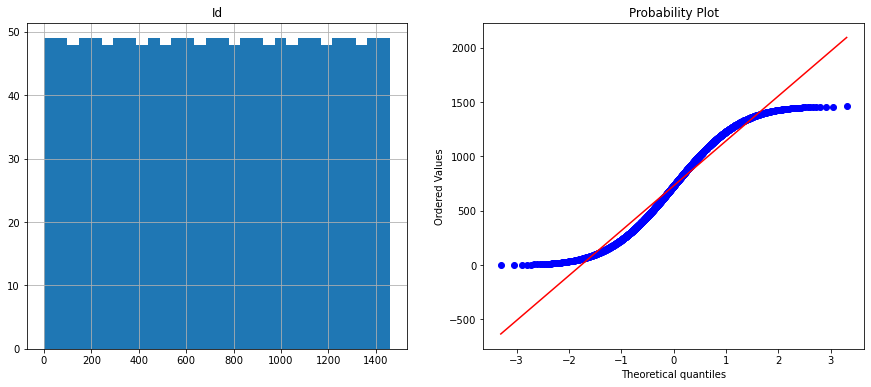

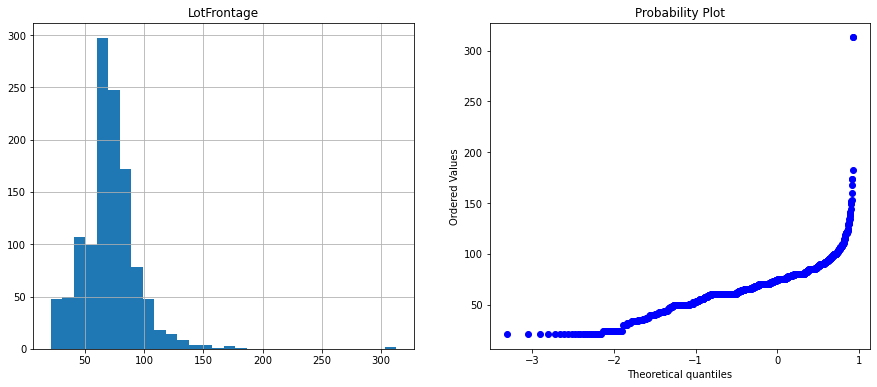

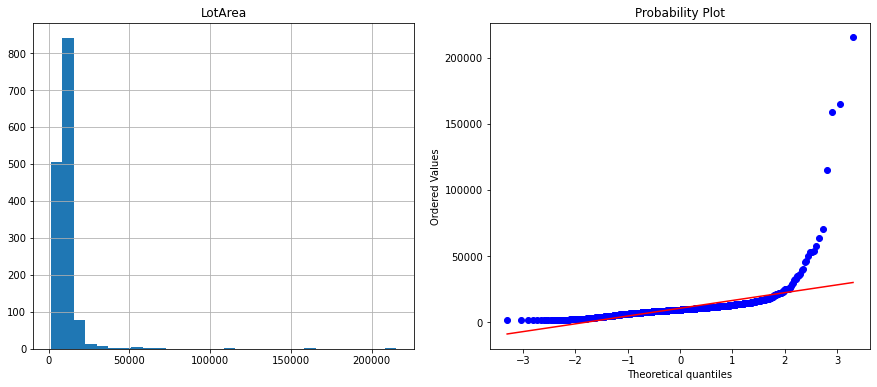

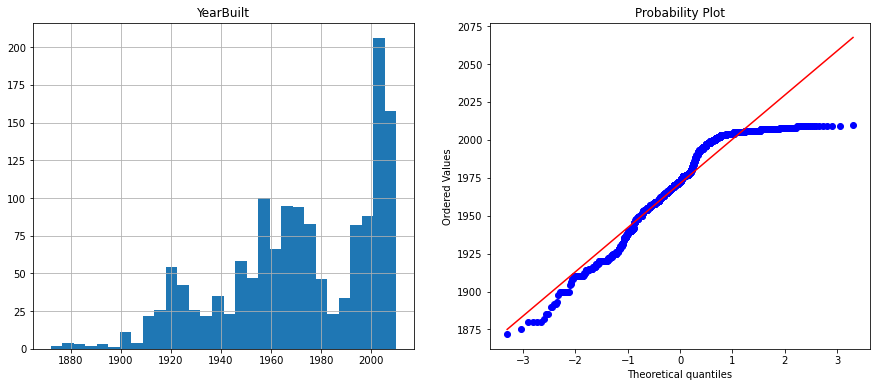

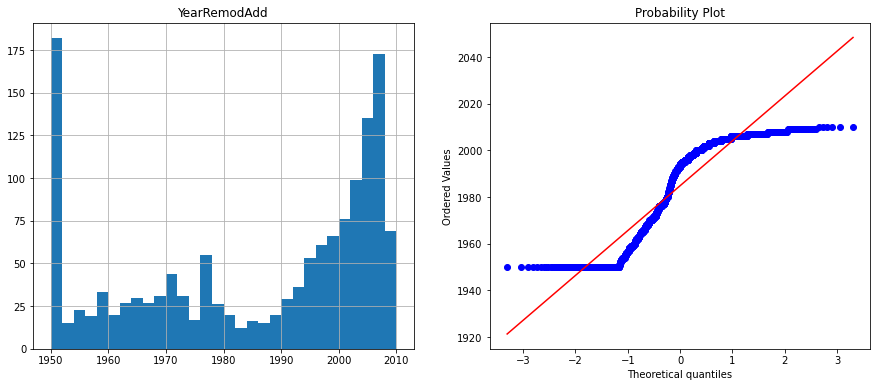

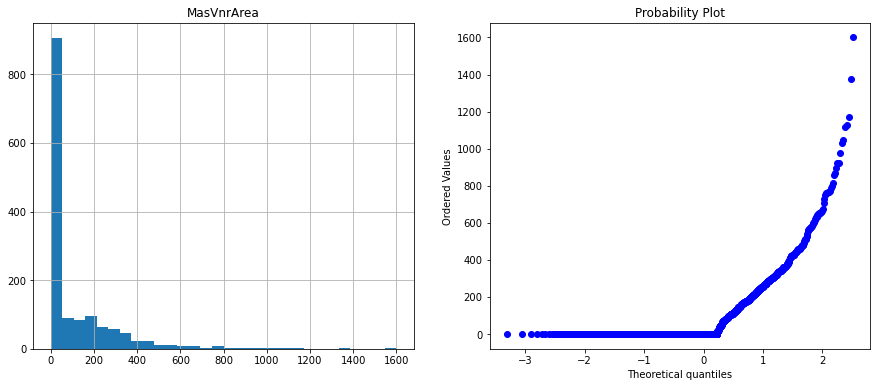

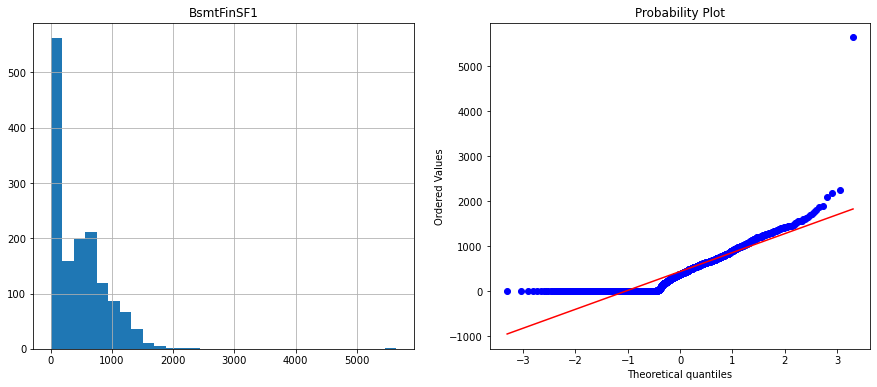

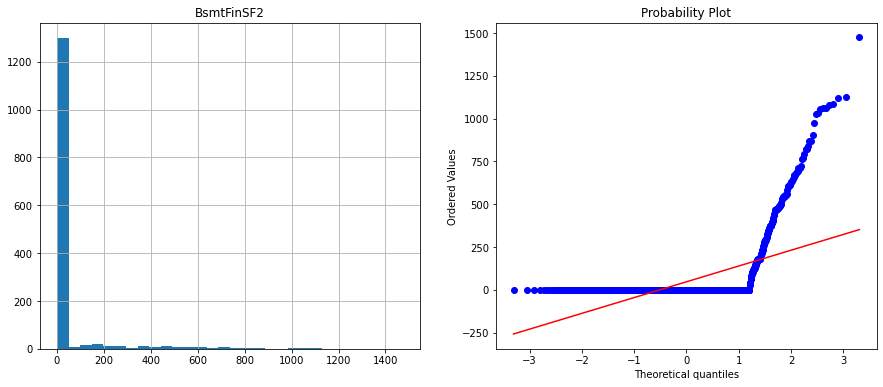

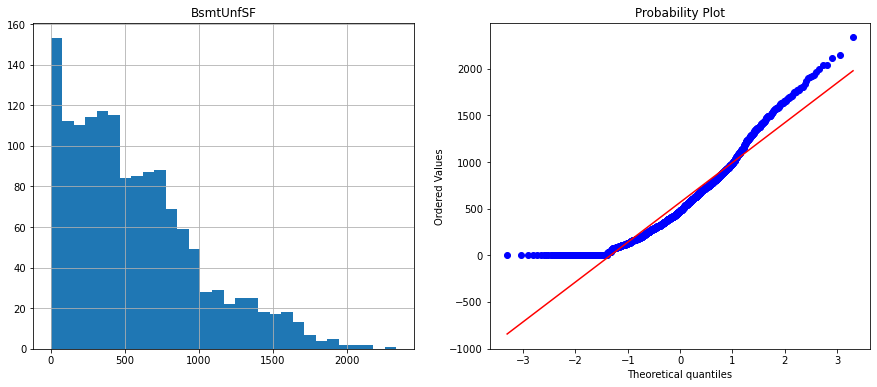

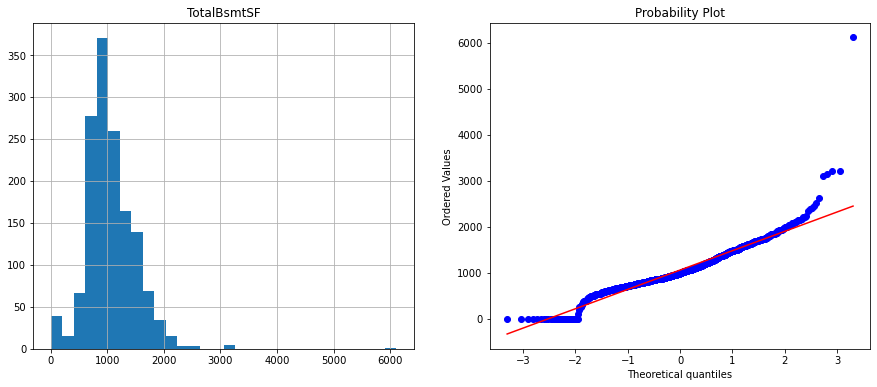

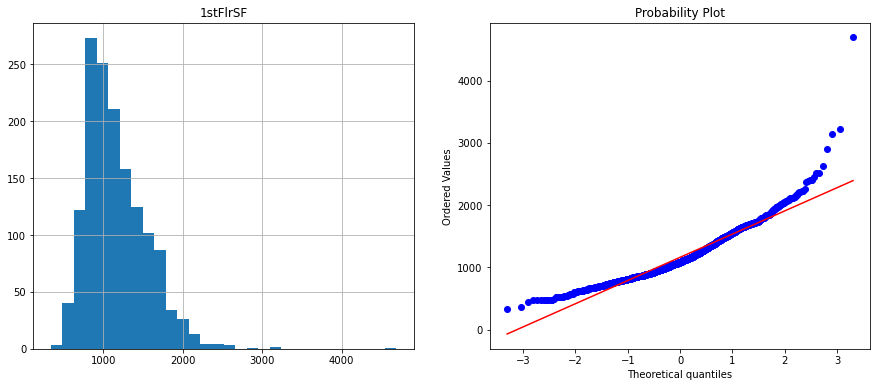

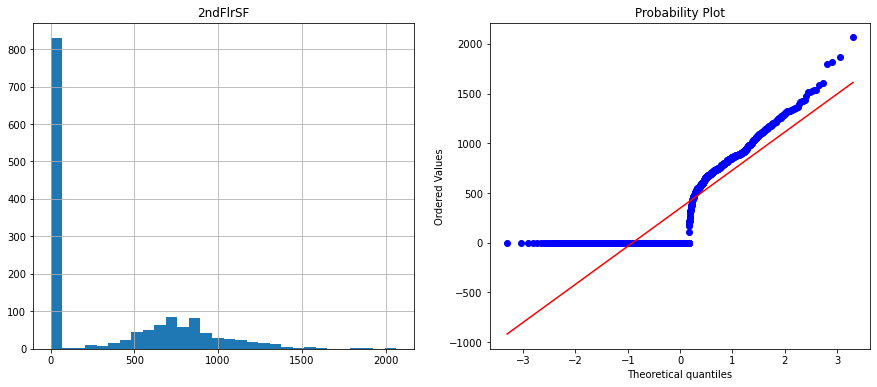

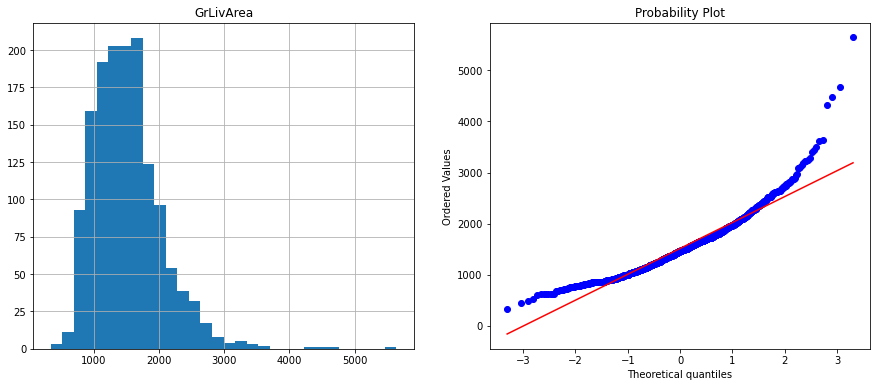

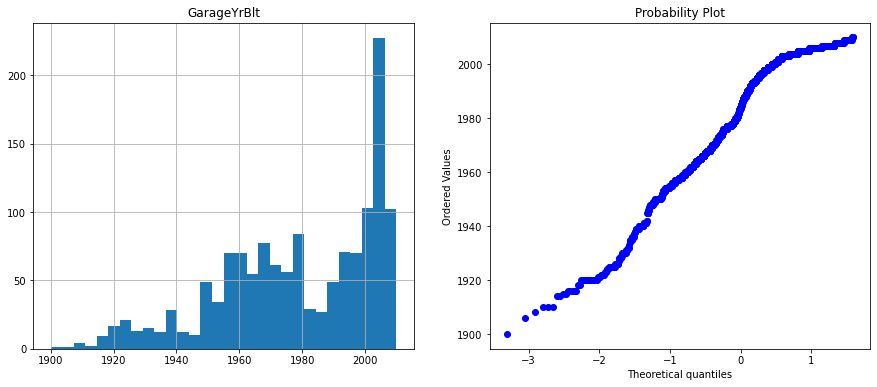

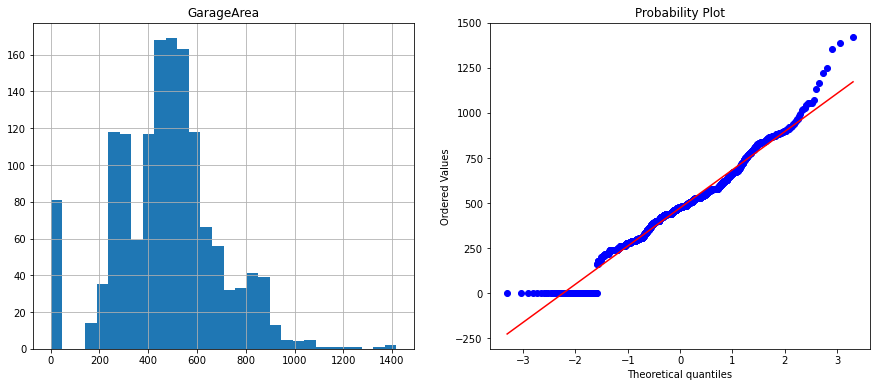

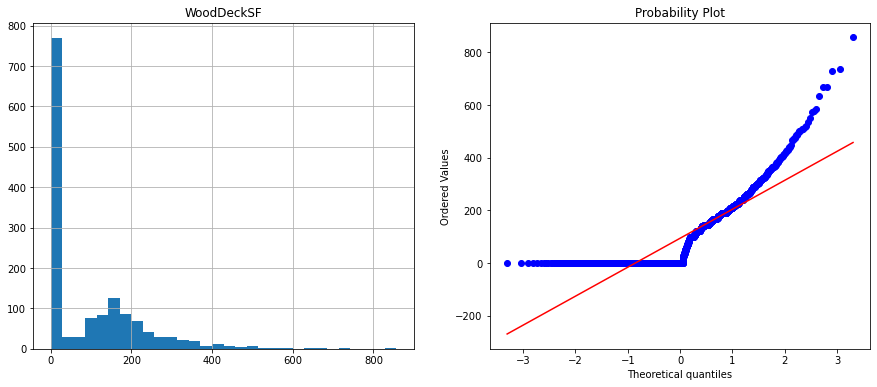

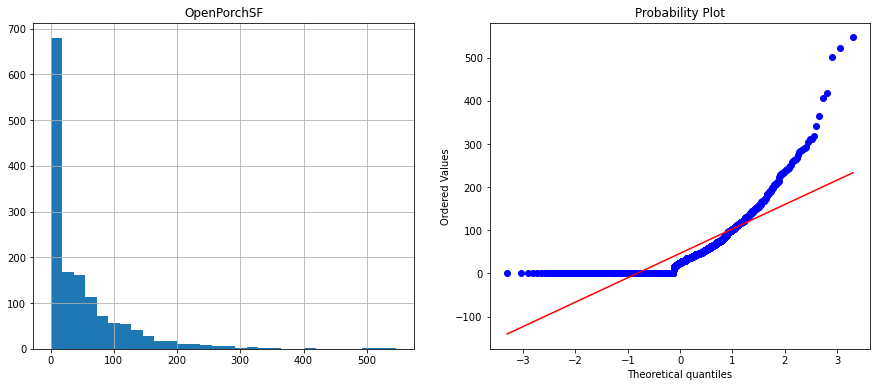

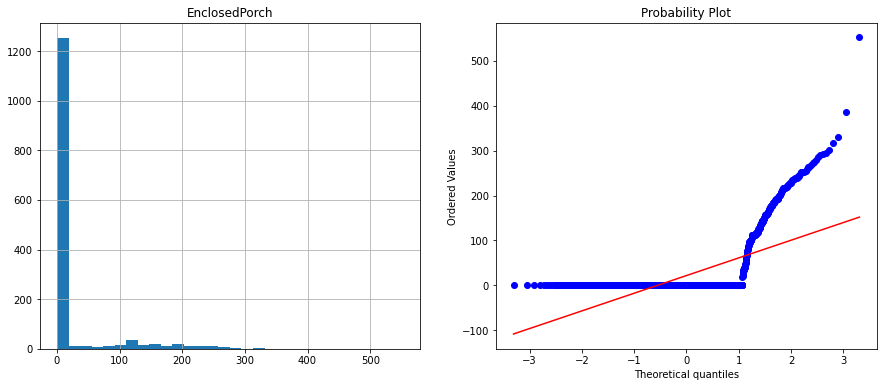

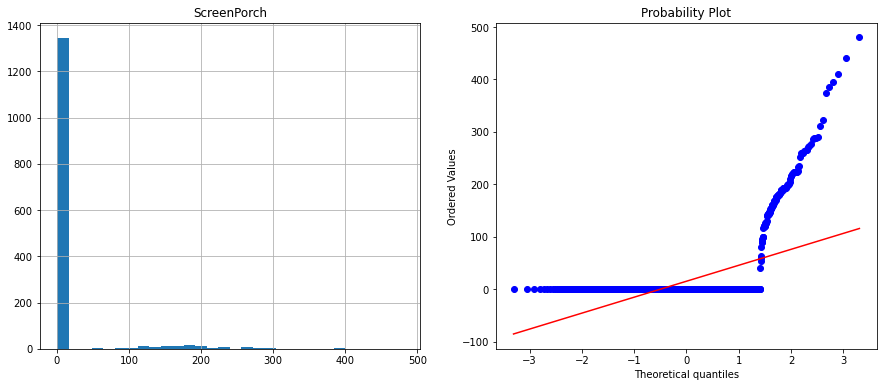

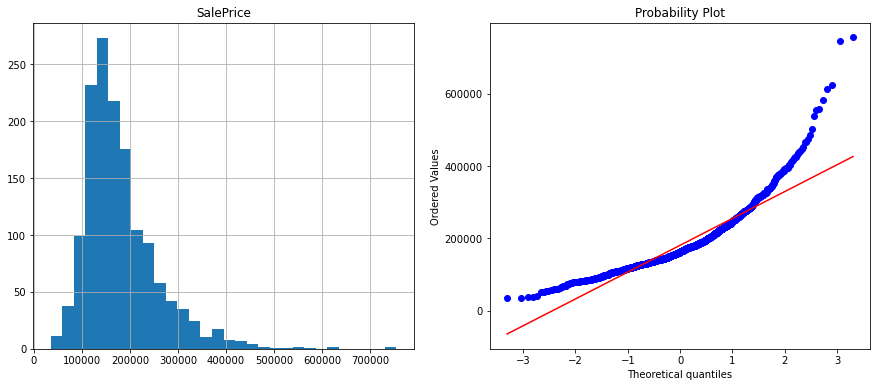

In [ ]:
for col in numeric_cont_vars:
        plot_density_variable(dataset, col)

In [ ]:
# Analizar la columna independiente de LotArea, para  poder llegar al calculo de sego, curtosis, rangos de normalidad
# importante antes de hacer la transformacion 

In [ ]:
dataset['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

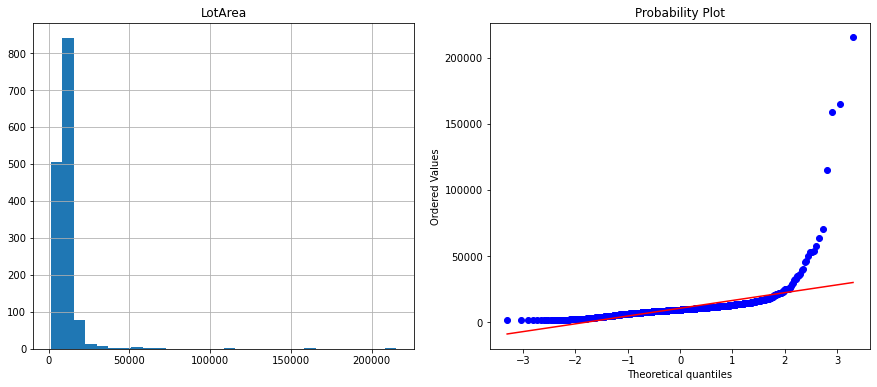

In [ ]:
plot_density_variable(dataset, 'LotArea')

In [ ]:
# con este código, se hace una copia para Tratar solo esa columna y que pasa si le aplicamos unas transformaciones
dataset_temp = dataset.loc[:, ['LotArea', 'SalePrice']]
dataset_temp


,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


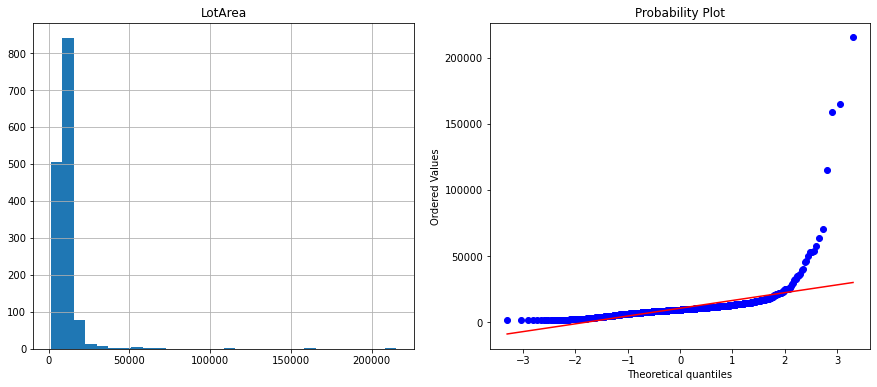

In [ ]:
plot_density_variable(dataset, 'LotArea')


In [ ]:
#aplicamos una transformación algoritmica a ese resultado 
dataset_temp ['LotArea_Log']= np.log(dataset['LotArea'])

In [ ]:
dataset_temp.head()

,LotArea,SalePrice,LotArea_Log
0,9.041922,208500,9.041922
1,9.169518,181500,9.169518
2,9.328123,223500,9.328123
3,9.164296,140000,9.164296
4,9.565214,250000,9.565214


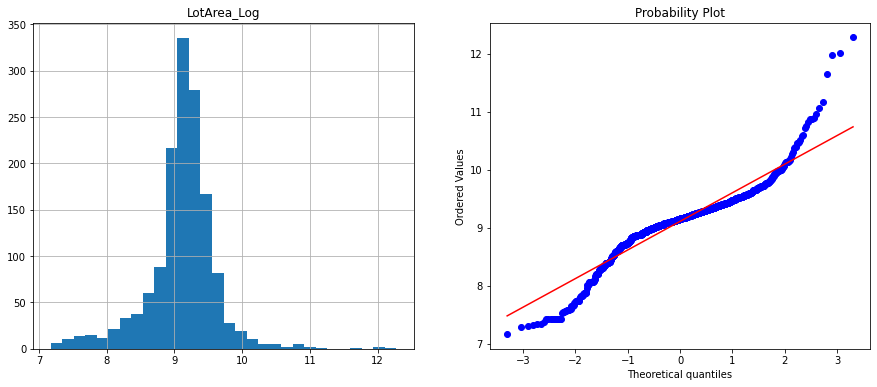

In [ ]:
#dominio de una función: signica conocer cuales son los valores que admitela función
plot_density_variable(dataset_temp, 'LotArea_Log')

In [ ]:
#Se utiliza la transformación algoritmica, cuando la variable tiene valroes muy grandes, para volverlos más pequeños.
# si hay valores negativos: automaticamente hace una excepción y levanta un número, pero no se puede aplicar está transformación 
# a valores negativos.
# es bueno antes de aplicar una transformación, hacer una validación  de dominio, para evitar errores matemáticos. 


In [ ]:
# Transformación Inversa

In [ ]:
dataset_temp['LoteArea_inv'] = (1/ dataset ['LotArea'])

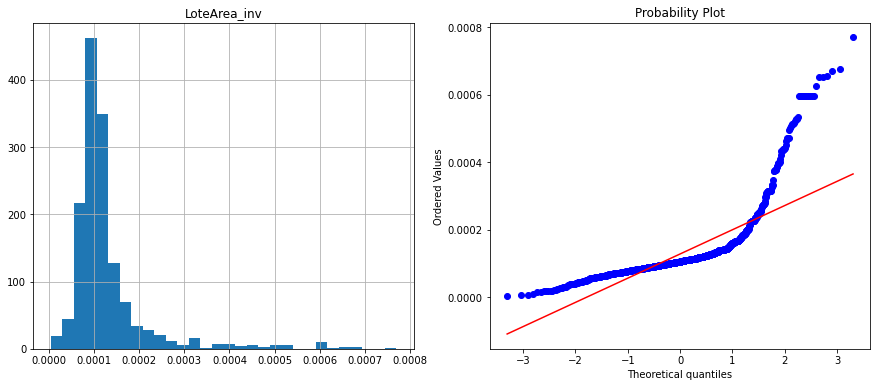

In [ ]:
plot_density_variable(dataset_temp, 'LoteArea_inv')

In [ ]:
# TRansformación al cuadrado, Polinomial  de orden 2
# para números negativos si funciona está transformación, porque vuelve positvos todos. 

In [ ]:
dataset_temp['LoteArea_quadratic'] = (dataset ['LotArea']**2)

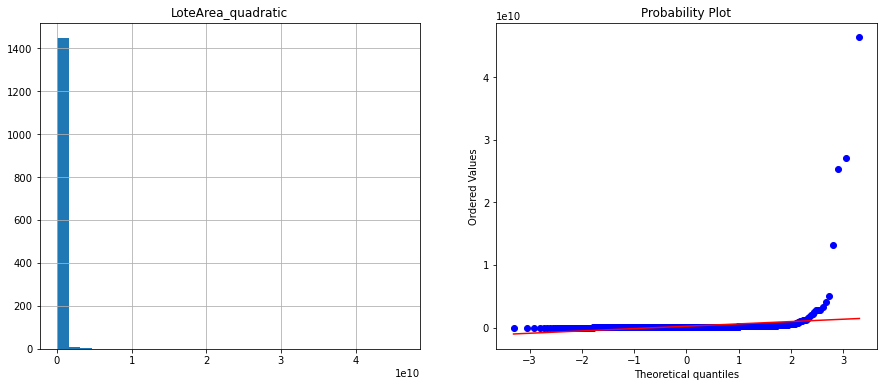

In [ ]:
plot_density_variable(dataset_temp, 'LoteArea_quadratic')

In [ ]:
#Transformación Box-Cox: 

In [ ]:
# Intalar Libreria 
import scipy.stats as stats

In [ ]:
dataset_temp['LotArea_boxCox'], lambdaX= stats.boxcox(dataset_temp['LotArea'])

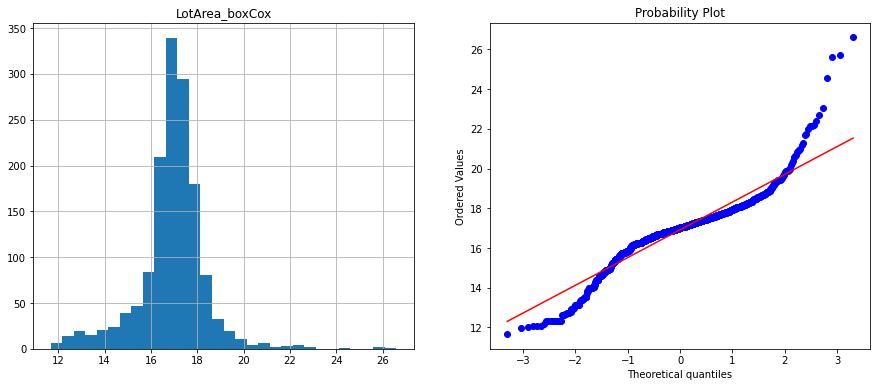

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_boxCox')

In [ ]:
# TRansformación de YeoJohnson
dataset_temp['LotArea_YJ'], lambdaX= stats.yeojohnson(dataset_temp['LotArea'])

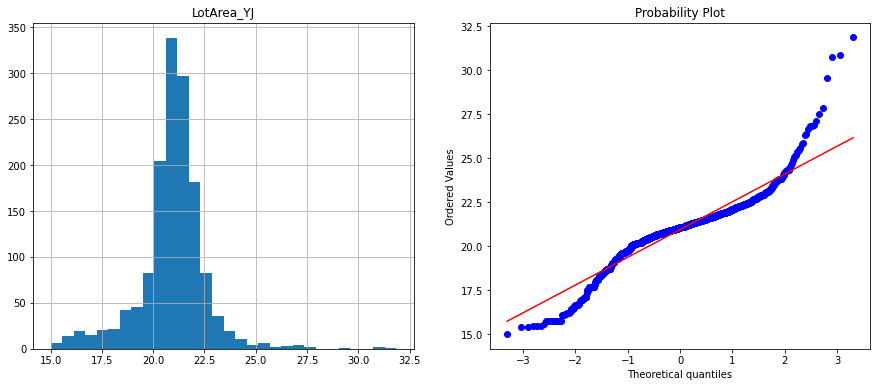

In [ ]:
plot_density_variable(dataset_temp, 'LotArea_YJ')

In [ ]:
# usando la correlación, indicar cualq sería la mejor correlación?  * tarea una función  que determine lcual sería la 
#la mejor transformación 

In [ ]:
# obtener la corelación
np.corrcoef(dataset_temp['LotArea_boxCox'], dataset_temp['SalePrice'])[0,1]

0.3902636595756342

In [ ]:
np.corrcoef(dataset_temp['LotArea_YJ'], dataset_temp['SalePrice'])[0,1]

0.39018875821374865

In [ ]:
np.corrcoef(dataset_temp['LoteArea_quadratic'], dataset_temp['SalePrice'])[0,1]

0.11446844700039827

In [ ]:
np.corrcoef(dataset_temp['LotArea_Log'], dataset_temp['SalePrice'])[0,1]


0.3885202679345966

In [ ]:
np.corrcoef(dataset_temp['LoteArea_inv'], dataset_temp['SalePrice'])[0,1]

-0.29507440361064213

In [ ]:
# para hacer estos procesos automaticos, hay dos criterios:
# que primete calcule el coeficiente de correlación  si vale la pena, si se vuelve más grande determinar que tan normal es la distribución dependiendo su transformación
 #si se vuelve normal , basandose en la curtosis o Sesgo 

In [ ]:
# HAcer que una variable no sea normal, se vuelva lo más normal posible.


In [ ]:
# Outliers
# para inspección visual, por medio de gráficas

In [116]:
def inspect_outliers (df, variable):
    plt.figure(figsize= (15,6))

    plt.subplot(131)
    sns.displot(df[variable], bins =30)
    plt.title("Densisd-Histograma: " + col )


    plt.subplot(132)
    stats.probplot(df[variable], dist= "norm", plot= plt)
    plt.title("QQ-Plot:" + col)

    plt.subplot(133)
    sns.boxplot(y= df[variable])
    plt.title("Boxplot:" + col)
    
    plt.show()


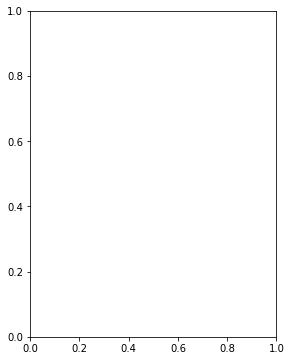

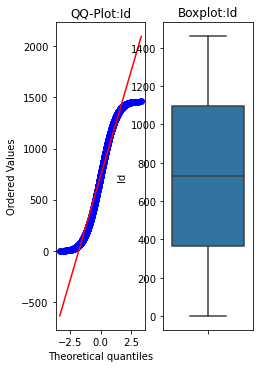

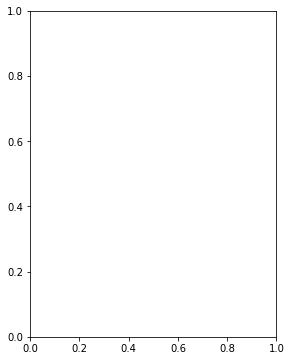

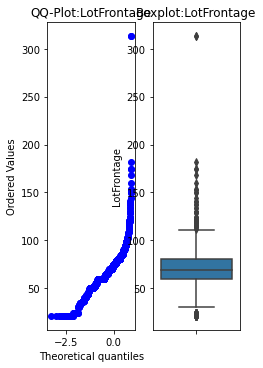

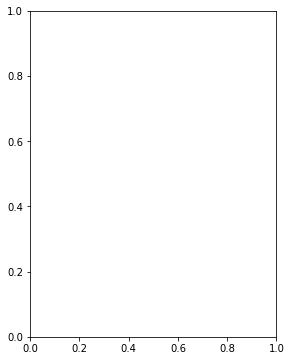

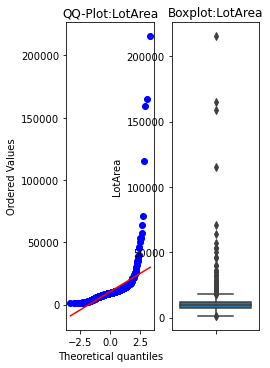

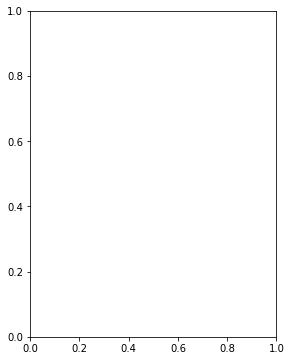

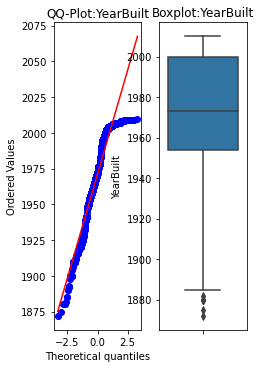

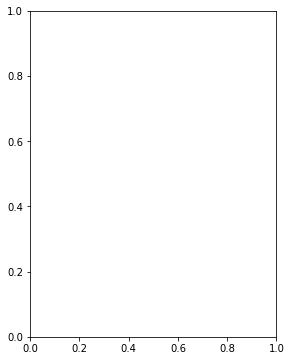

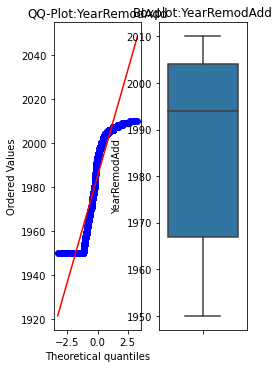

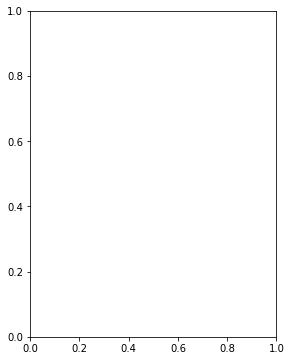

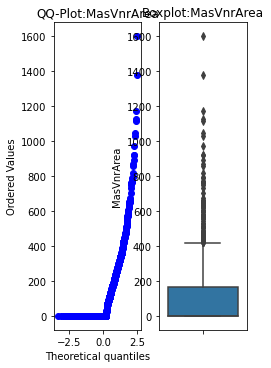

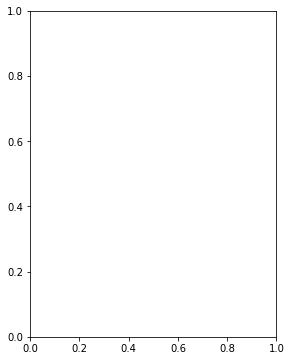

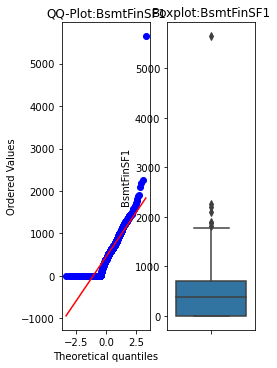

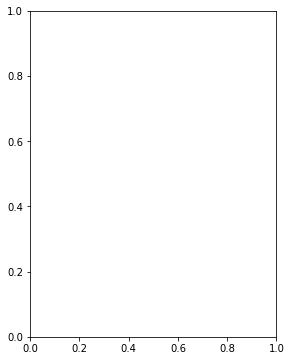

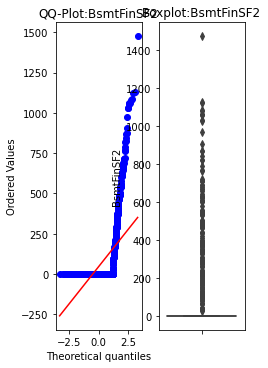

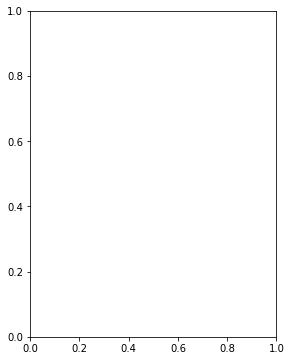

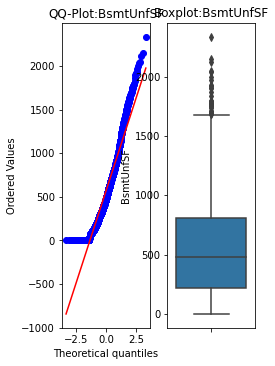

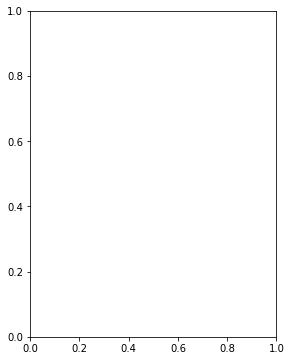

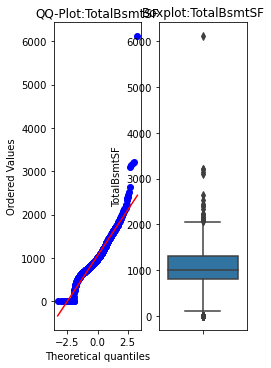

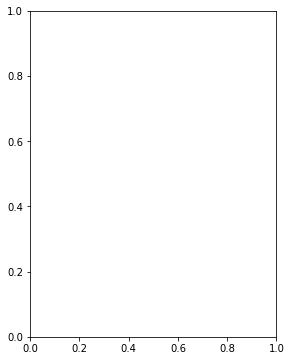

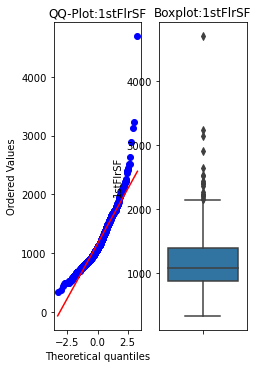

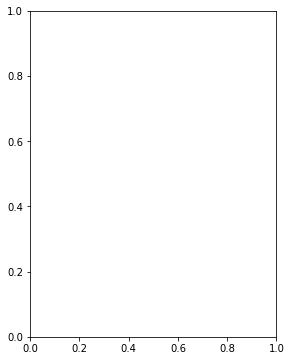

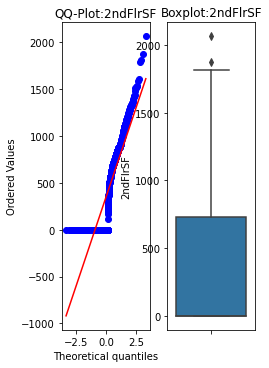

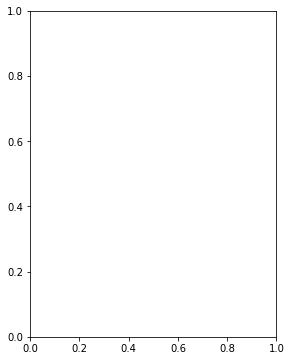

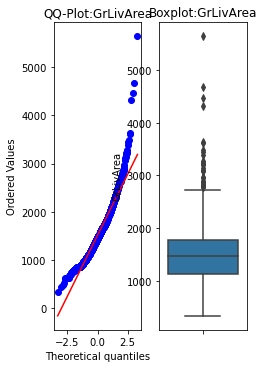

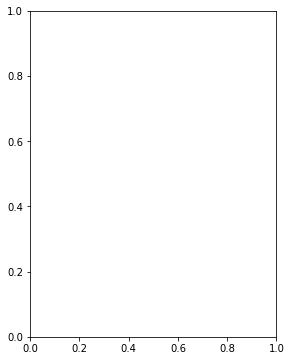

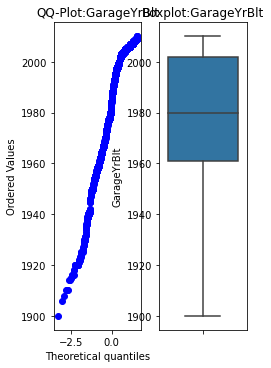

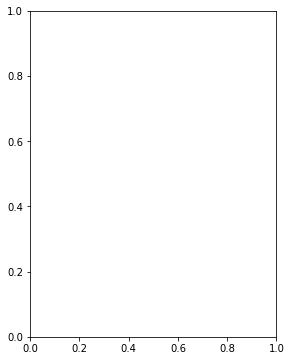

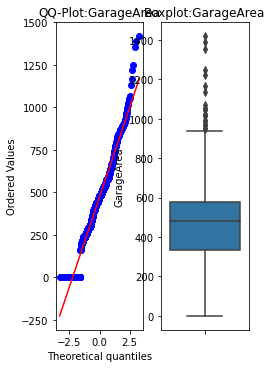

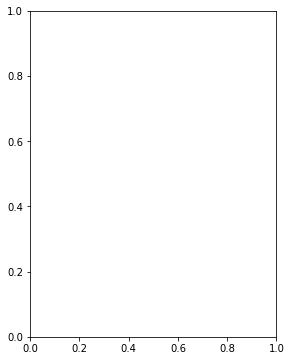

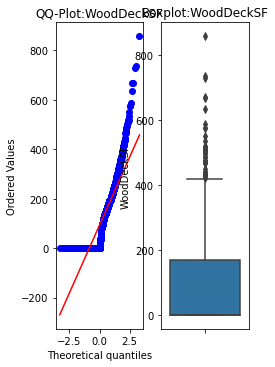

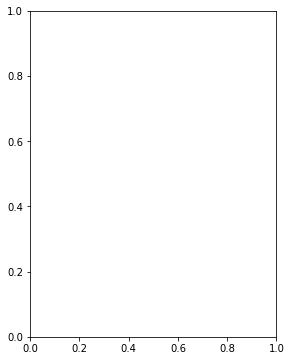

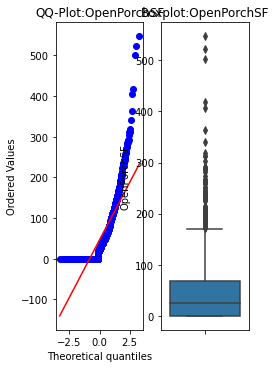

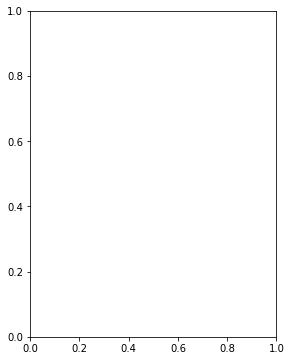

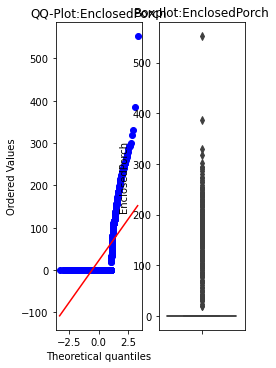

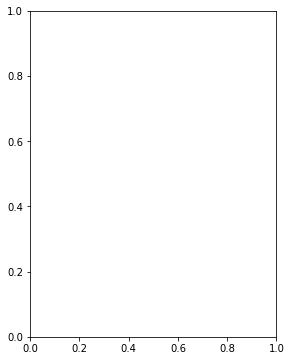

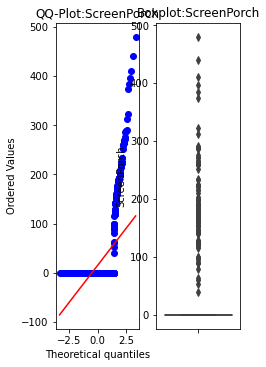

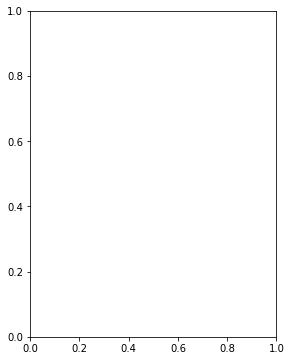

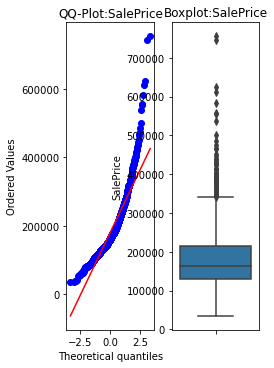

In [117]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [121]:
# ¿Cómo saber si un outlier, sea outlier a nivel númerico, se debe de hacer un calculo de extremos.
# crear una función que detecte los outliers
def detect_outliers(df, variable, factor):
    IQR = df[variable]

In [123]:
factor = 1.75

In [136]:
# Detectando outliers
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile (0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)  
    return LI, LS

In [137]:
detect_outliers(dataset, 'GarageArea', 1.75)

(-88.125, 998.625)

In [138]:
detect_outliers(dataset, 'GrLivArea', 1.75)

(-3.1875, 2909.4375)

In [126]:
# código  sin función, referencia
IQR = dataset['LotFrontage'].quantile(0.75) - dataset['LotFrontage'].quantile (0.25)
LI = dataset['LotFrontage'].quantile(0.25) - (IQR*factor)
LS = dataset['LotFrontage'].quantile(0.75) + (IQR*factor)


In [140]:
IQR

21.0

In [141]:
LI

22.25

In [142]:
LS

116.75

In [143]:
# Este código muestra  la cantidad de columnas que cumplen con el rango
temp = dataset[((dataset ['LotFrontage'] >= LI) & (dataset['LotFrontage'] <= LS))]
temp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [144]:
1 - len(temp)/ len(dataset)

0.21986301369863015

In [139]:
#((dataset['LotFrontage'] >= LI) & (dataset['LotFrontage'] <= LS))


0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: LotFrontage, Length: 1460, dtype: bool

In [ ]:
# Procedimiento para convertir un valor que se considera Outlier, volverlo el limite superior. 
# Capping

In [145]:
dataset_temp = dataset


In [147]:
limites= detect_outliers(dataset_temp, 'LotFrontage', 1.75)
LF_LI , LF_LS = limites

In [155]:
dataset_temp['LotFrontage_Cap'] = np.where(dataset_temp['LotFrontage']> LF_LI, LF_LS, 
                                    np.where(dataset_temp['LotFrontage'] < LF_LI, LF_LS, dataset_temp['LotFrontage']))



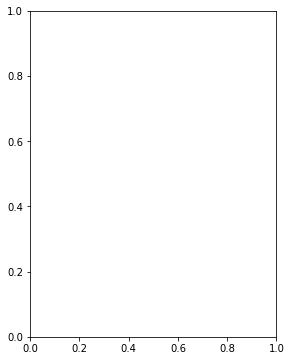

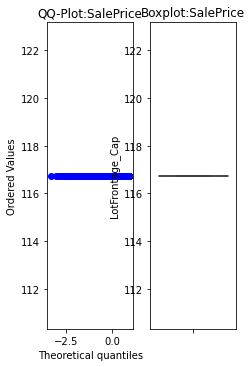

In [156]:
inspect_outliers (dataset_temp, 'LotFrontage_Cap')

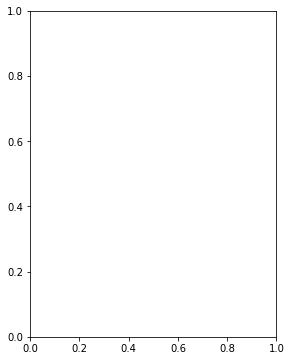

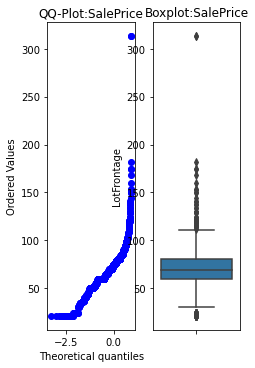

In [157]:
# Comparando solo LotFrontage
inspect_outliers (dataset_temp, 'LotFrontage')

In [158]:
# Le caemos encima a la varible original, para tratarla. 
def detect_outliers(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile (0.25)
    LI = df[variable].quantile(0.25) - (IQR*factor)
    LS = df[variable].quantile(0.75) + (IQR*factor)  
 
    df[variable] = np.where(df [variable]> LS, LS, 
                                    np.where(df[variable] < LI, LI,  df[variable]))


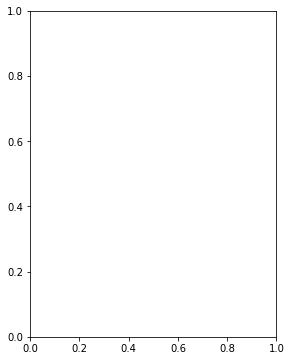

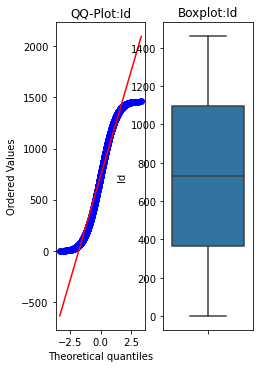

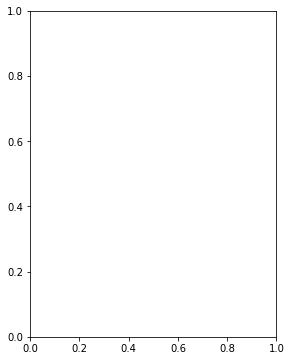

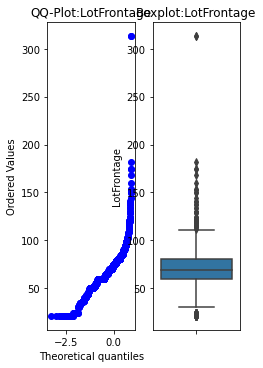

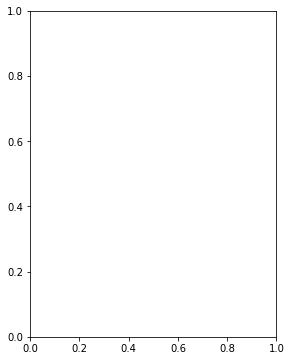

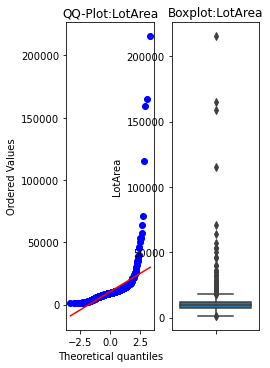

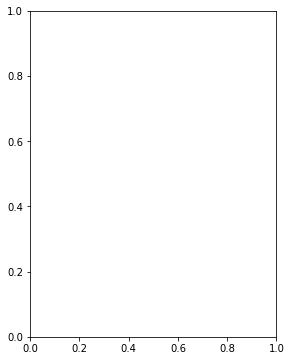

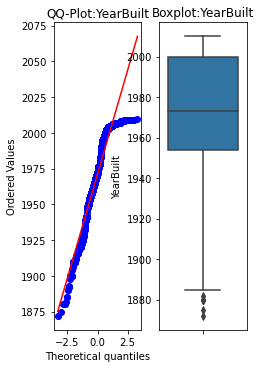

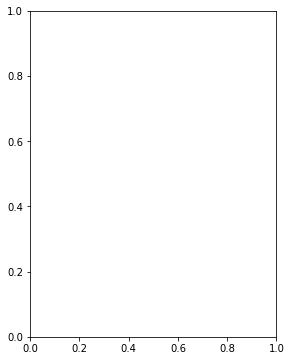

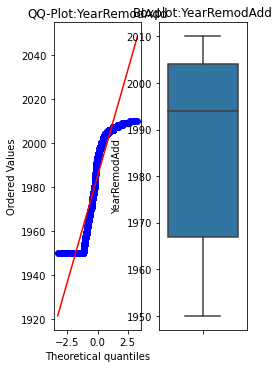

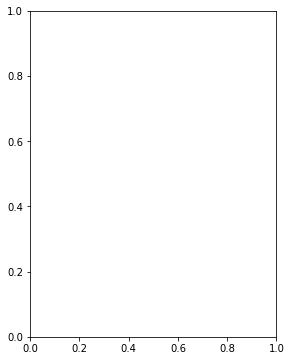

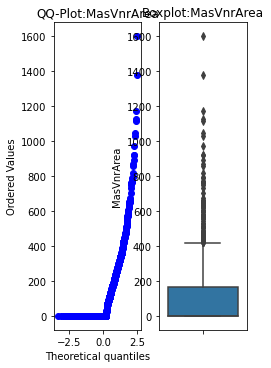

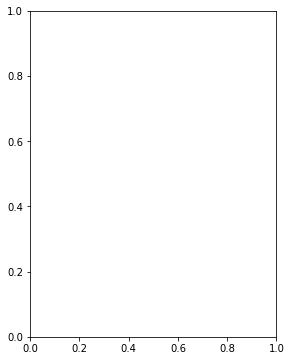

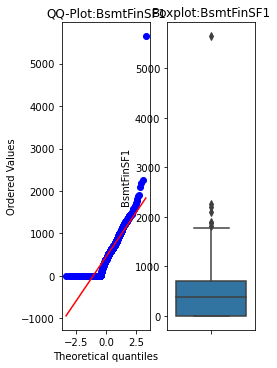

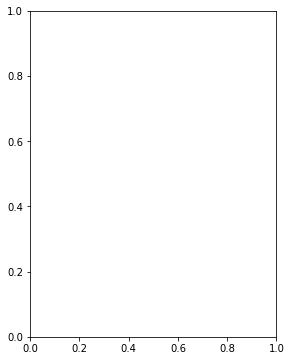

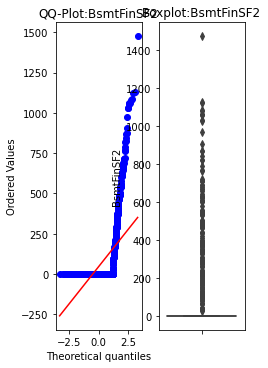

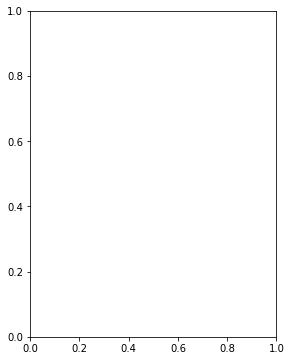

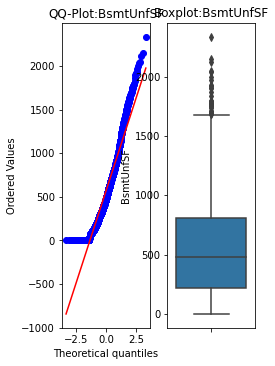

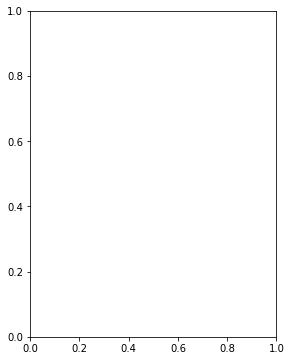

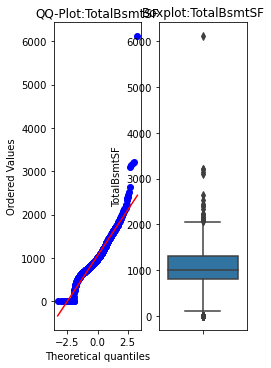

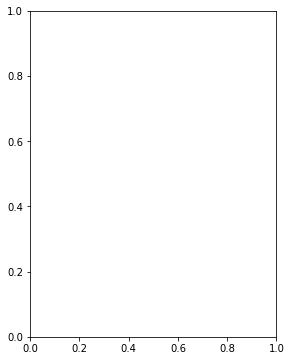

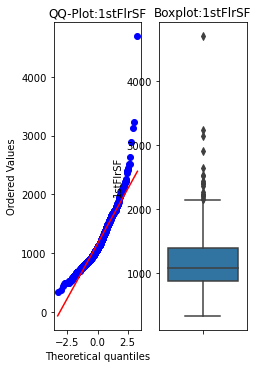

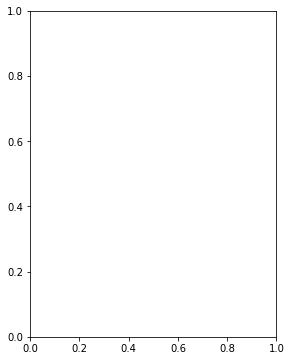

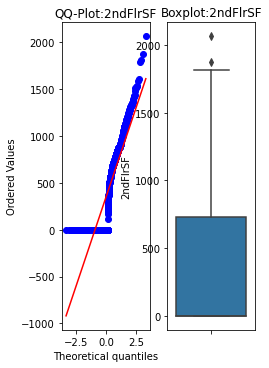

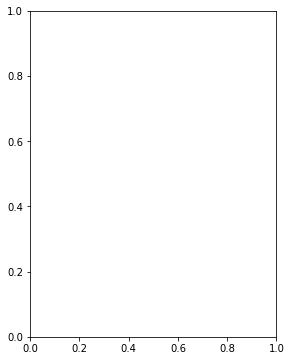

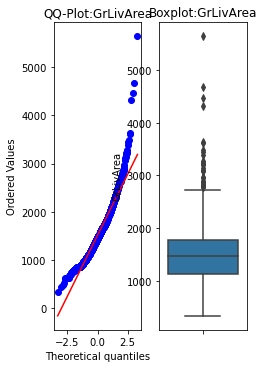

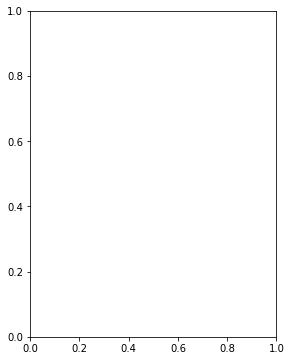

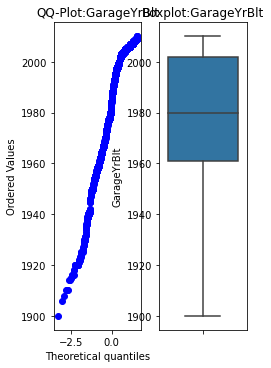

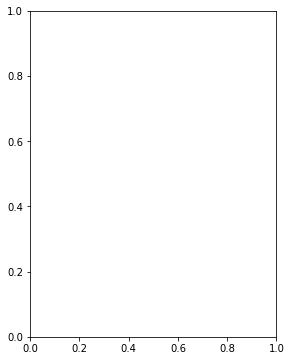

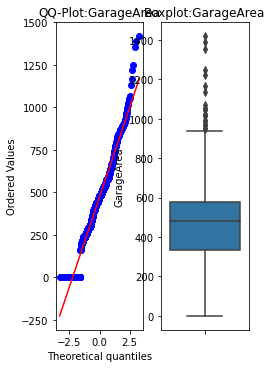

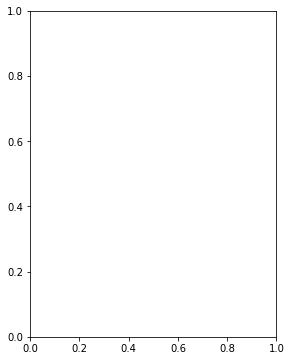

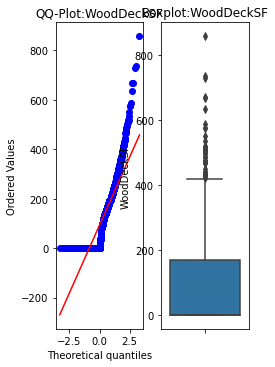

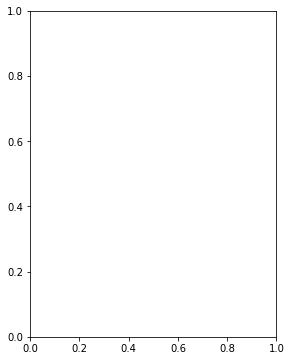

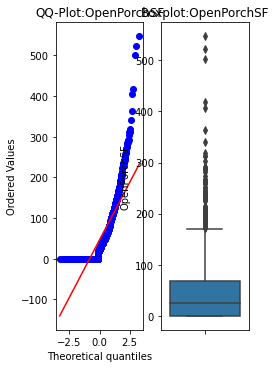

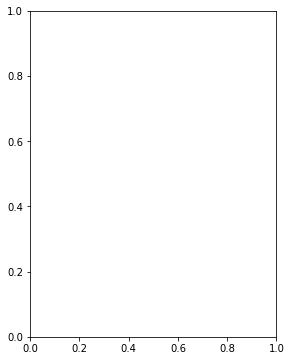

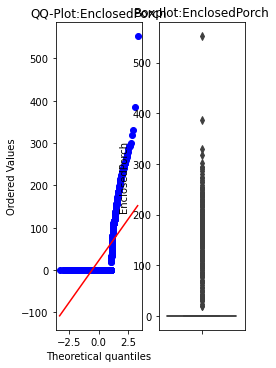

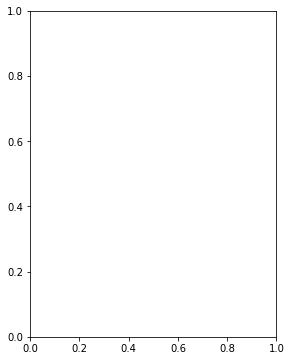

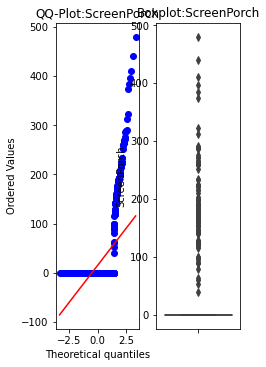

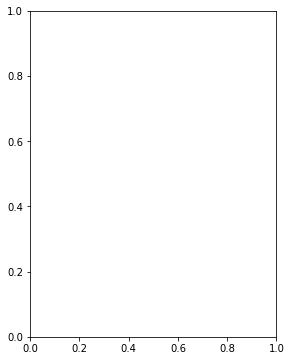

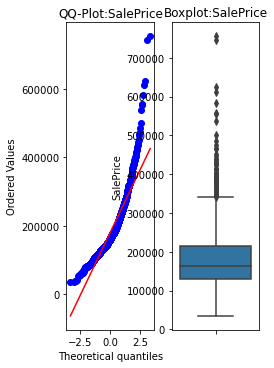

In [159]:
for col in numeric_cont_vars:
    inspect_outliers(dataset, col)

In [160]:
for col in  numeric_cont_vars:
    outlier_treatment(dataset, col 1.75)

SyntaxError: invalid syntax (Temp/ipykernel_11776/3115048873.py, line 2)

In [ ]:
# Feauture Scaling: escalar los valores
# buscamos el espacio de la solución de la data. 

In [161]:
from sklearn.preprocessing import StandardScaler


In [162]:
dataset_temp = dataset.loc[:, numeric_cont_vars]

In [163]:
dataset_temp

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,1647,1999.0,460,0,40,0,0,175000
1456,1457,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,2073,1978.0,500,349,0,0,0,210000
1457,1458,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,2340,1941.0,252,0,60,0,0,266500
1458,1459,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1950.0,240,366,0,112,0,142125


In [164]:
dataset_temp.head()


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


In [166]:
Scaler = StandardScaler()
Scaler.fit(dataset_temp)
 # calcula el parametro de configuración para cada columna.

StandardScaler()

In [167]:
StandardScaler()

StandardScaler()

In [168]:
dataset_temp_scaled = pd.DataFrame(Scaler.transform(dataset_temp), columns =dataset_temp.columns)

In [171]:
np.round(dataset_temp_scaled.describe(), 1) # el 1 es para indicar que es un decimal


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.0,1201.0,1460.0,1460.0,1460.0,1452.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1379.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-2.0,-0.9,-3.3,-1.7,-0.6,-1.0,-0.3,-1.3,-2.4,-2.1,-0.8,-2.2,-3.2,-2.2,-0.8,-0.7,-0.4,-0.3,-1.8
25%,-0.9,-0.5,-0.3,-0.6,-0.9,-0.6,-1.0,-0.3,-0.8,-0.6,-0.7,-0.8,-0.7,-0.7,-0.6,-0.8,-0.7,-0.4,-0.3,-0.6
50%,0.0,-0.0,-0.1,0.1,0.4,-0.6,-0.1,-0.3,-0.2,-0.2,-0.2,-0.8,-0.1,0.1,0.0,-0.8,-0.3,-0.4,-0.3,-0.2
75%,0.9,0.4,0.1,1.0,0.9,0.3,0.6,-0.3,0.5,0.5,0.6,0.9,0.5,1.0,0.5,0.6,0.3,-0.4,-0.3,0.4
max,1.7,10.0,20.5,1.3,1.2,8.3,11.4,8.9,4.0,11.5,9.1,3.9,7.9,1.3,4.4,6.1,7.6,8.7,8.3,7.2


In [ ]:
### feature Enrineering Pipeline
# Paso 0 : Determinar tipo de variables
    #* Continuas
    #* Discretas
    #* Categóricas
    #* Temporales



# 1) paso :
#  Complete Case Analysis (CCA)
# * imputación de variables:
# * númericas.
# * Categoricas

In [ ]:
# 2 ) paso:
# Codificación de Variables catóricas
# * OHE
# * Codificación por Frecuencia / Densidad


In [ ]:
# 3) Transformación de variables:
# * Log
# * polinomio
# * Inversa
# * BoxCox
# * YeoJohnson.



In [ ]:
# 4) Outlier
# Detección basada en el IQR, Capping


In [ ]:
# 5) Feature Scaling
# Normalización ( dist. normal Estandar)
# Standarización (0,1)